In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

# Random Forest, Penguins
---

In [2]:
#!gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

In [3]:
penguins = pd.read_csv('penguins.csv')

In [4]:
# 결측치 확인 랜덤포레스트는 결측치 있어도 된다. 평균이나 median값을 넣어도 된다.
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# 결측치를 잘보여주는 시각화툴
#!pip install missingno

<AxesSubplot: >

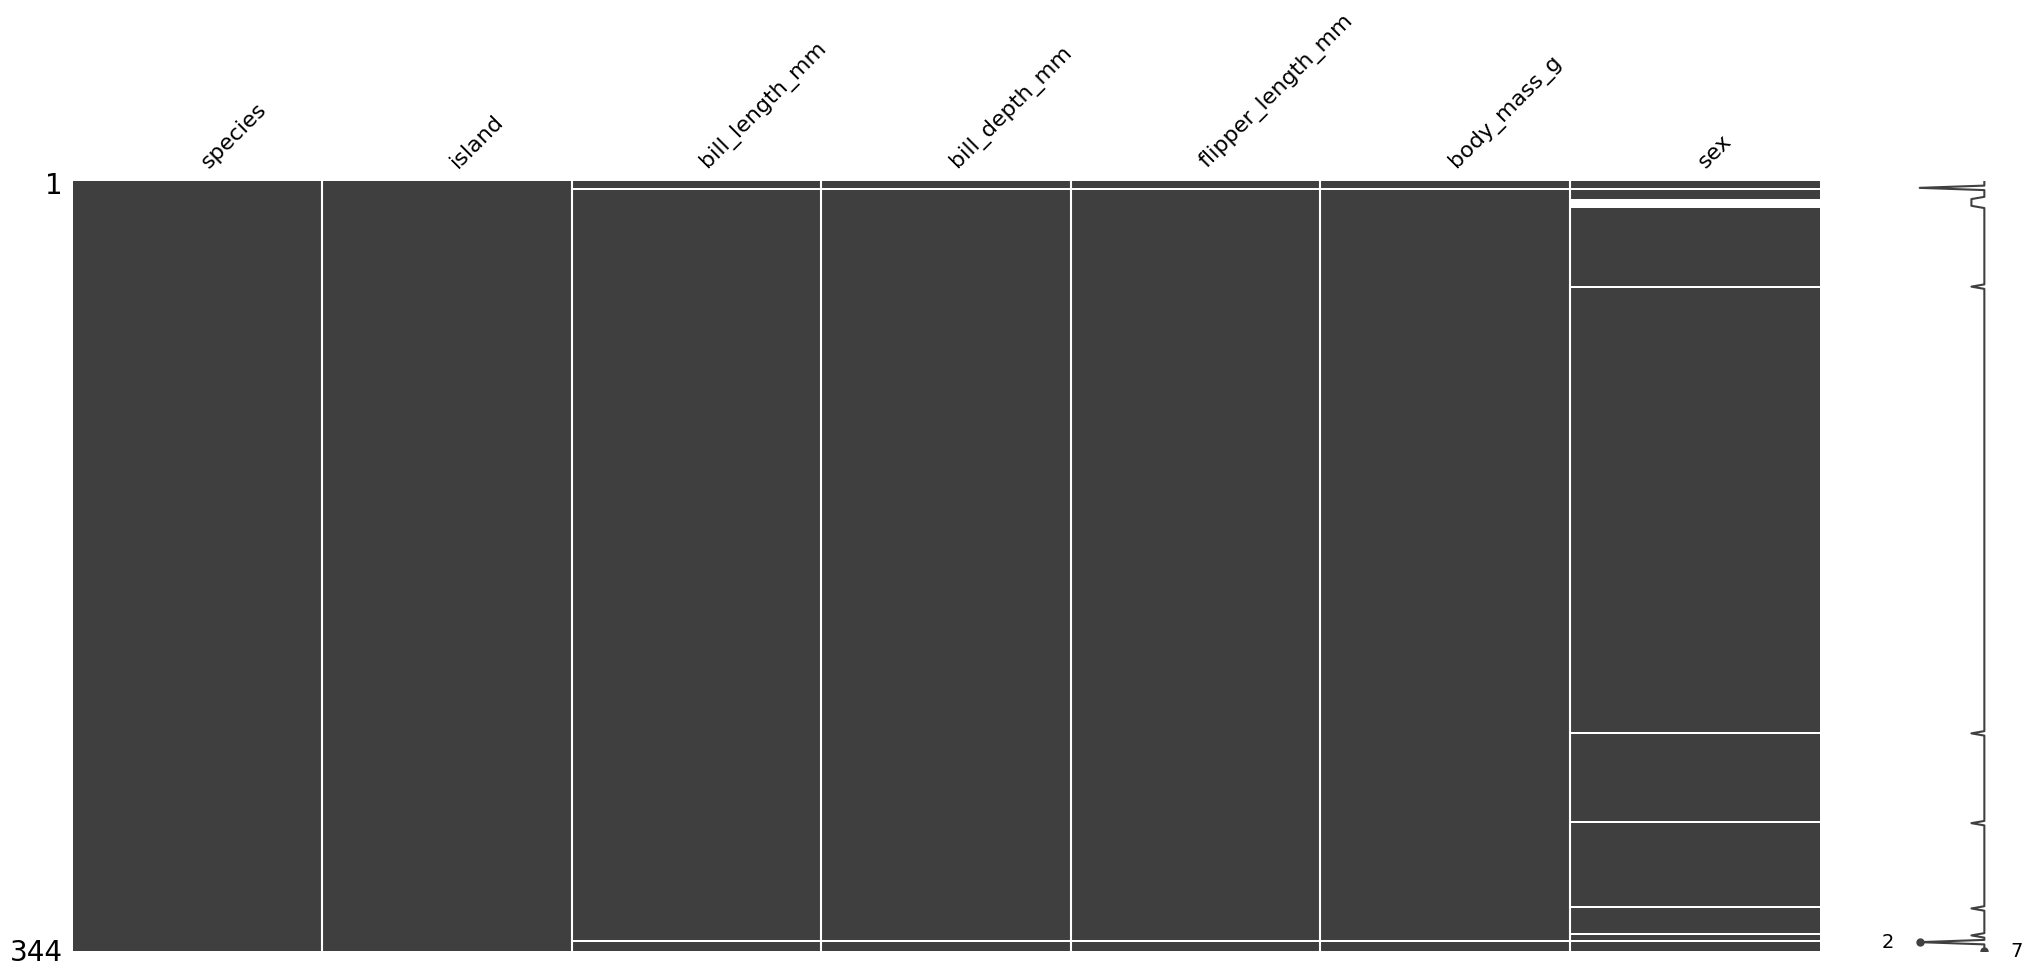

In [6]:
import missingno as msno

# 결측치는 흰색 라인이다.
msno.matrix(penguins)

In [7]:
penguins.loc[(penguins['bill_length_mm'].isna()&penguins['bill_depth_mm'].isna())]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
# subset은 bill_length_mm 가 nan 값인걸 모두 날려버림
df = penguins.dropna(subset=['bill_length_mm'])

<AxesSubplot: >

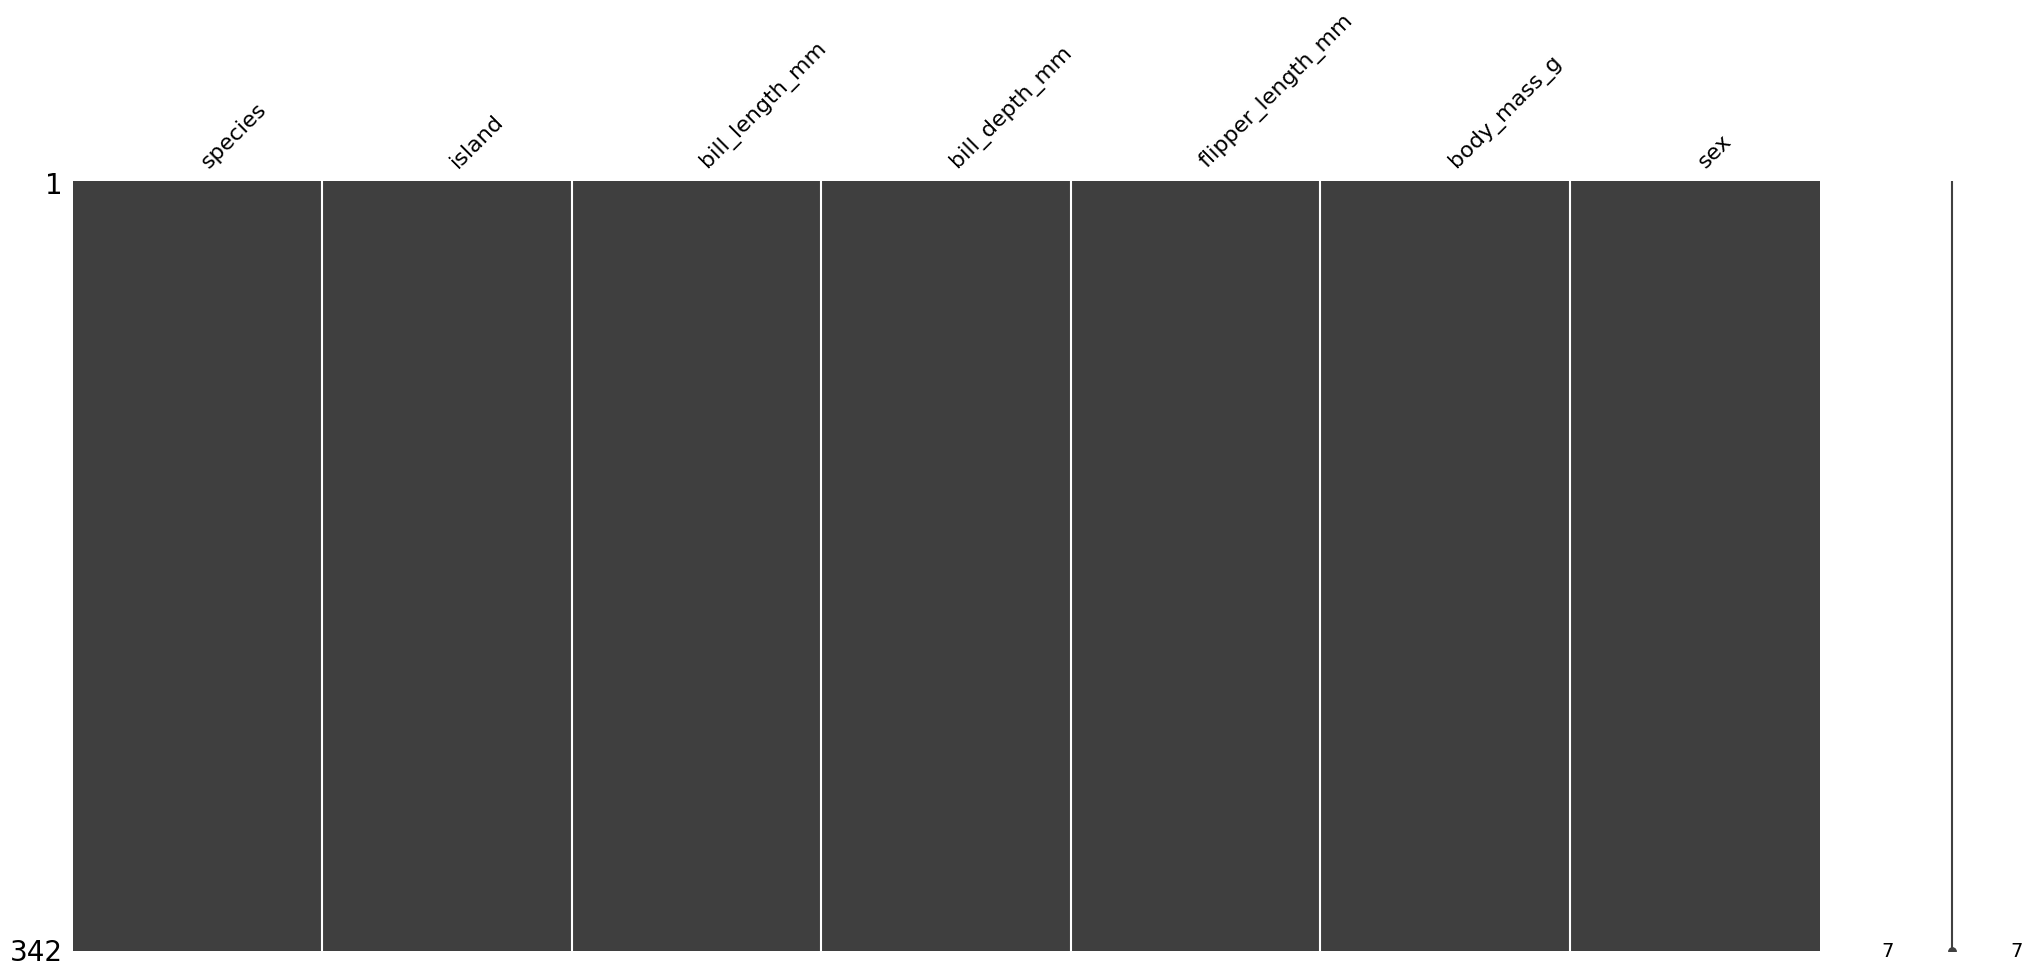

In [28]:
msno.matrix(df)

In [10]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [11]:
df['sex'].isna().sum()

9

In [12]:
df['sex'].fillna('NONE',inplace=True)

C:\Users\007\AppData\Local\Temp\ipykernel_6960\147336564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].fillna('NONE',inplace=True)


In [13]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

In [14]:
X = df.drop(['species'],axis=1)
y = df['species']

In [15]:
X.shape

(342, 6)

In [16]:
y.shape

(342,)

In [17]:
X['sex']=X['sex'].map({'MALE':0,'FEMALE':1,'NONE':2})
X['island']=X['island'].map({'Biscoe':0,'Dream':1,'Torgersen':2})

In [18]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,0
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
4,2,36.7,19.3,193.0,3450.0,1
5,2,39.3,20.6,190.0,3650.0,0


In [19]:
# label encoding 다른 방법
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['island'] = encoder.fit_transform(df['island'])

C:\Users\007\AppData\Local\Temp\ipykernel_6960\2819872313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = encoder.fit_transform(df['island'])


In [20]:
from sklearn.model_selection import train_test_split

# data set이 골고루 분리할려고 쓴다. stratify
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2022)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(273, 6) (69, 6) (273,) (69,)


In [21]:
feature_name = X_train.columns

In [22]:
X_train = X_train.values
y_train = y_train.values

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30,max_depth=3)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [24]:
clf.score(X_train,y_train)

0.9816849816849816

In [25]:
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [26]:
# feature 중요도 계산
clf.feature_importances_

array([0.1233968 , 0.28962332, 0.18946879, 0.31941297, 0.07710336,
       0.00099477])

In [27]:
sr = pd.Series(clf.feature_importances_,index=feature_name)
sr = sr.sort_values(ascending=False)
sr

flipper_length_mm    0.319413
bill_length_mm       0.289623
bill_depth_mm        0.189469
island               0.123397
body_mass_g          0.077103
sex                  0.000995
dtype: float64

<AxesSubplot: >

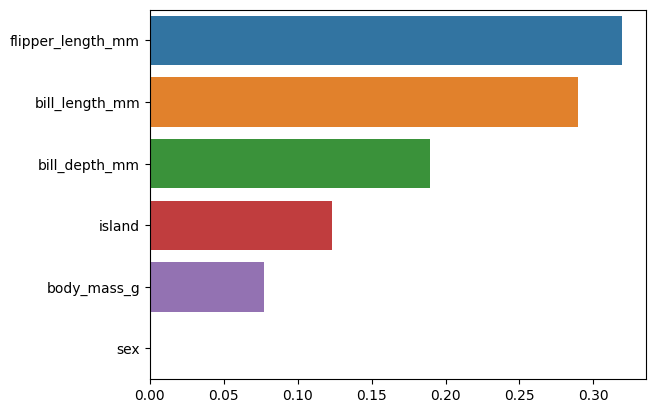

In [29]:
sns.barplot(x=sr,y=sr.index)

### 테스트 데이터

In [31]:
y_pred = clf.predict(X_test)

C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
my.print_score(y_test,y_pred,average='weighted')

accuracy: 0.9710144927536232
precision: 0.9746376811594203
recall: 0.9746376811594203
